Lecture 1: What is Machine Learning and how is it related to Physics? 
======

## Preliminaries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
'''Set the defaults for your plots.'''
# plt.rcParams.update({'font.size': 20, 'figsize':(8,6)})
SMALL_SIZE = 12
MEDIUM_SIZE = 15
BIGGER_SIZE = 18

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.rc('axes', linewidth = 3 )
plt.rc('lines', linewidth = 3 )

plt.rc('lines', markersize = 5 )

plt.rc('figure', figsize=(8,4) )         # Image size

## Simple ML problem
What do you think "Machine Learning (ML)" is?


Imagine you have a mass attached to a spring and you displace the object and record the force required for displacement and the corresponding displacement. 
Now, there could be two things you are interested in
* How much force do I need for a specific displacement, if I haven't already tried that?
* What's the spring constant?

This reflects on the two distinct approaches. Here we are mostly concerned with the first question, namely the ability to predict rather than understanding, but not always. 


### Ideal case: Simple data and simple model
We start with some synthetic data with no noise.


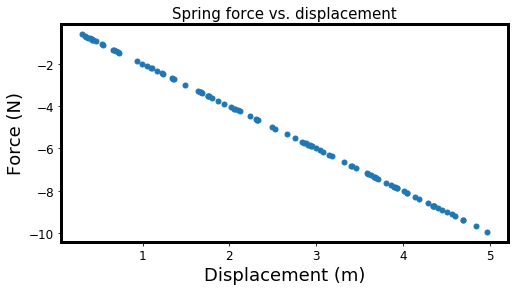

In [3]:
def spring_F(k, n_samples=100,x_max = 5):
    x_list = np.random.uniform(0,x_max,n_samples)
    return x_list.reshape(n_samples,1) , -k*np.abs( x_list ).reshape(n_samples,1)

x_list , spring_force_list = spring_F(2,)
x_label = 'Displacement (m)'
y_label = 'Force (N)'
plt_title = 'Spring force vs. displacement'

fig = plt.figure()
ax = fig.add_subplot(111, xlabel=x_label, ylabel=y_label, title=plt_title)

ax.scatter(x_list , spring_force_list)
plt.show()
# plt.close()

### Training an agent to estimate the force
Let's assume that we don't know where and how this data is generated/collected and want to find the model that estimates the force. 

In [37]:
def loss(y_list, x_list, w_list, bias=0):
    n_sample = len(y_list)
    y_list = y_list.reshape(n_sample,1)
    x_list = x_list.reshape(n_sample,1)
#     print(y_list.shape, x_list.shape)
    f_list =  ( np.dot(x_list, w_list ) + bias ).reshape( len(y_list)  , 1 )
    return np.sqrt( np.sum(  ( y_list - f_list )**2 )   )/n_sample


def simplified_loss(w, b=0):
    return loss(spring_force_list , x_list, w, b)

In [38]:
loss(spring_force_list, x_list, [1],0)

0.8676802738964245

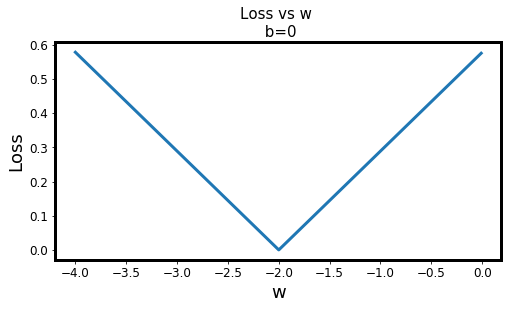

In [61]:
w_axis = np.arange(-4,0, .01)
losses = [simplified_loss(w, b=0) for w in w_axis]

fig = plt.figure()
ax = fig.add_subplot(111, xlabel='w', ylabel='Loss', title='Loss vs w \n b=0')
ax.plot(w_axis, losses)

plt.show()

In [40]:
from scipy.optimize import minimize

In [48]:
min_w = minimize( (lambda w: loss(spring_force_list, x_list, [w[0]],w[1] )),[.1,.1])

In [42]:
print(min_w.x)
print(simplified_loss([min_w.x[0] ],min_w.x[1]) )

[-2.00000000e+00 -3.11627309e-09]
1.9919665986117953e-10


### Using sklearn

In [80]:
from sklearn.linear_model import LinearRegression

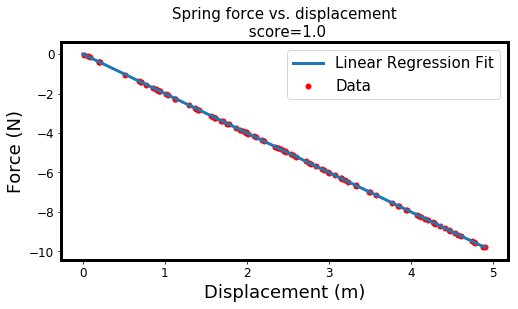

In [83]:
reg = LinearRegression()
reg.fit(x_list, spring_force_list)
x = np.arange(0,5,.1).reshape(50,1)

fig = plt.figure()
ax = fig.add_subplot(111, xlabel=x_label, ylabel=y_label, title=plt_title + 
                     '\n score=' + str( reg.score(x_list, spring_force_list) ) )

ax.plot(x, reg.predict( x ) ,label='Linear Regression Fit' )
ax.scatter(x_list , spring_force_list, color='r',label='Data' )
ax.legend(loc=0)
plt.show()


## Realistic case: Let's see how the actual data would look like. 


In [106]:
'''This data is taken from lab report of students in Phys_Lab 3.'''
url = 'https://raw.githubusercontent.com/sraeisi/MachineLearning_Physics/master/Lec_1/Spring.csv'
exp_data = pd.read_csv('url')
# exp_data = pd.read_csv('Spring.csv')
exp_data

,Displacement,Force
0,11.5,0.0
1,14.7,0.1
2,18.0,0.2
3,21.3,0.3
4,24.5,0.4
5,27.6,0.5


### Learning


In [43]:
'''This data is taken from lab report of students in Phys_Lab 3.'''
url = 'https://raw.githubusercontent.com/sraeisi/MachineLearning_Physics/master/Lec_1/Spring.csv'
exp_data = pd.read_csv('url')
# exp_data = pd.read_csv('Spring.csv')
exp_data

,Displacement,Force
0,11.5,0.0
1,14.7,0.1
2,18.0,0.2
3,21.3,0.3
4,24.5,0.4
5,27.6,0.5


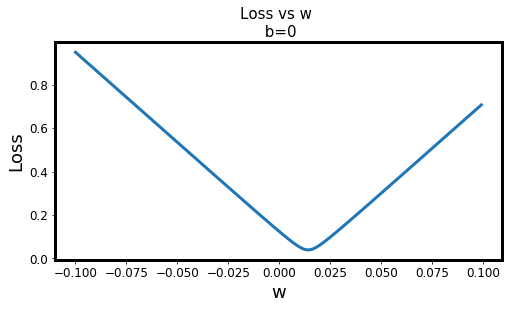

In [65]:
exp_w_axis = np.arange(-.1,.1, .001)
exp_losses = [loss(exp_data['Force'].values, exp_data['Displacement'].values, w,bias=0 ) for w in exp_w_axis]

fig = plt.figure()
ax = fig.add_subplot(111, xlabel='w', ylabel='Loss', title='Loss vs w \n b=0')
ax.plot(exp_w_axis, exp_losses)

plt.show()

In [66]:
'''
AAAAAAAAAAAAAAAA
Do your own code for finding the fit. 

Define the cost function
Minimize it
Find the w that gives the minimum values of the loss. 
'''

exp_min_w = minimize((lambda w: loss(exp_data['Force'].values, exp_data['Displacement'].values, [w[0]],w[1] )),[.1,.1])
print(exp_min_w.x)
print(loss(exp_data['Force'].values, exp_data['Displacement'].values,[exp_min_w.x[0] ],exp_min_w.x[1]) )

[ 0.03091535 -0.35594099]
0.0007182370023726758


In [1]:
exp_reg = LinearRegression()
exp_reg.fit(exp_data['Displacement'].values.reshape(len(exp_data),1), exp_data['Force'])
exp_x = np.arange(10,30,.5).reshape(40,1)
fig = plt.figure()
ax = fig.add_subplot(111, xlabel=x_label, ylabel=y_label, title=plt_title)

ax.plot( exp_x , exp_reg.predict( exp_x ) ,label='Linear Regression Fit' )
ax.scatter(exp_data.Displacement , exp_data.Force, color='r',label='Data' )
ax.legend(loc=0)
plt.show()


NameError: name 'LinearRegression' is not defined

## Why do we need this? 
Can't we just do what we used to do? Just find the cause and effect relation and establish the laws that governs the physics?

The challenge is that it is usually not this simple to establish the connection between the quantity of interest and parameters that define the problem. For instance, we could have
- Too many parameters involved
- Complex non-linearities in the problem

### Robustness: What happens if there's a bit of noise?
Let's add some noise to the data, also for simplicity, assume that the noise is gaussian. Let's see what you get!

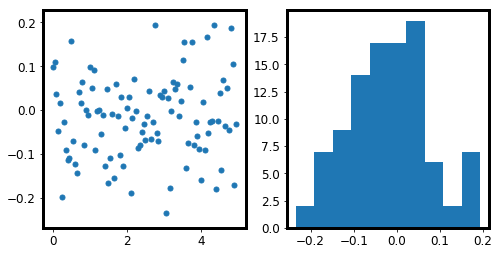

In [110]:
'''
g_noise takes the mean value of the noise, x_0 and 
the variance of the noise, sigma and 
the number of sample points, n_points and 
returns an array of shape (n_points,1)
'''
def g_noise(x0, sigma ,n_points=100):
    return np.random.normal(x0, sigma, size=n_points)


n_s = 100
x = np.arange(0,5,5/n_s).reshape(n_s,1)
noise = g_noise(0,.1,len(x)).reshape(n_s,1)

fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.scatter(x, noise)

ax2.hist(noise)

plt.show()
plt.tight_layout()
plt.close()

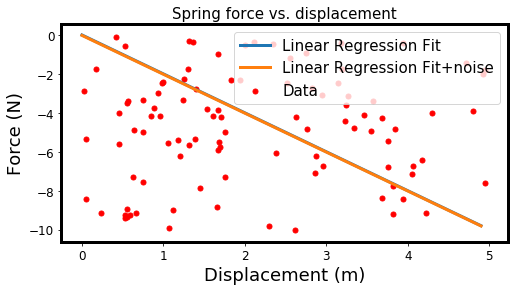

In [118]:
n_s = 100
x_list, noisy_f_list =  spring_F(2,n_samples=n_s)
noisy_f_list += noise

reg2 = LinearRegression()
reg2.fit(x_list, noisy_f_list)

fig = plt.figure()
ax = fig.add_subplot(111, xlabel=x_label, ylabel=y_label, title=plt_title)

ax.plot(x, reg.predict( x ) ,label='Linear Regression Fit' )
ax.plot(x, reg2.predict( x ) ,label='Linear Regression Fit+noise' )
ax.scatter(x_list , spring_force_list, color='r',label='Data' )
ax.legend(loc=0)
plt.show()


# plt.plot(x, reg.predict( x ) , color='b')
# plt.plot(x, reg2.predict( x ) , color='g')
# plt.scatter(x_list , f_list, color='r')
# plt.show()
# plt.close()


Is this always the case?
Under what conditions?

## A little bit of complication
What if the data is not at simple as we saw above. What happens then?
Here simulate the position of a particle under acceleration with some initial velocity and some initial position and collect the data of the x(t). 


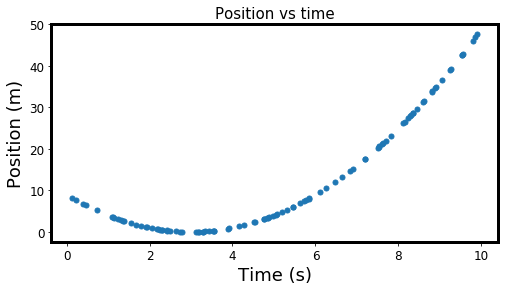

In [135]:
def position(a, v=0, x0=0, n_samples=100, t_max=5):
    t_list = np.random.uniform(0,t_max,n_samples)
    return t_list.reshape(n_samples,1) , (1/2*a*t_list**2 + v*t_list+x0).reshape(n_samples,1)

t_list , pos_list = position(2,v=-6,x0=9, t_max=10)
x_label = 'Time (s)'
y_label = 'Position (m)'
plt_title = 'Position vs time'

fig = plt.figure()
ax = fig.add_subplot(111, xlabel=x_label, ylabel=y_label, title=plt_title)

ax.scatter(t_list , pos_list)
plt.show()

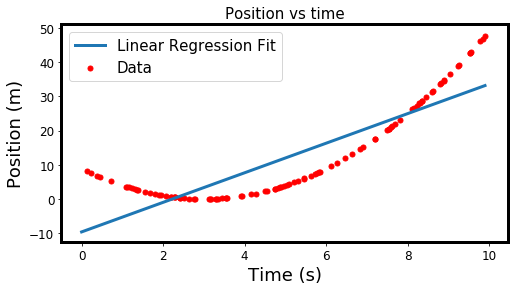

In [136]:
reg_nl = LinearRegression()
reg_nl.fit(t_list, pos_list)
x = np.arange(0,10,.1).reshape(100,1)

fig = plt.figure()
ax = fig.add_subplot(111, xlabel=x_label, ylabel=y_label, title=plt_title)

ax.plot(x, reg_nl.predict( x ) ,label='Linear Regression Fit' )
ax.scatter(t_list , pos_list, color='r',label='Data' )
ax.legend(loc=0)
plt.show()

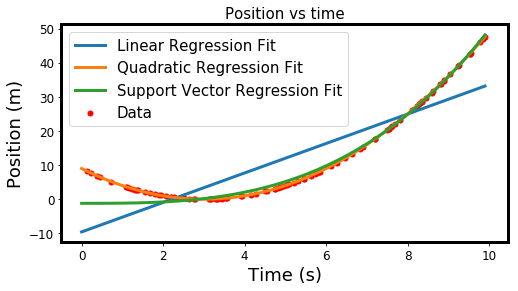

In [152]:
reg_nl = LinearRegression()
reg_nl.fit(t_list, pos_list)
x = np.arange(0,10,.1).reshape(100,1)

reg_nl2 = LinearRegression()
reg_nl2.fit(         np.hstack([t_list, t_list**2])      , pos_list)

from sklearn.svm import SVR
svr_nl = SVR(kernel='poly')
svr_nl.fit(t_list, pos_list.reshape(n_s, ) )

fig = plt.figure()
ax = fig.add_subplot(111, xlabel=x_label, ylabel=y_label, title=plt_title)

ax.plot(x, reg_nl.predict( x ) ,label='Linear Regression Fit' )
ax.plot(x, reg_nl2.predict( np.hstack([x,x**2]) ) ,label='Quadratic Regression Fit' )
ax.plot(x, svr_nl.predict( x ) ,label='Support Vector Regression Fit' )
ax.scatter(t_list , pos_list, color='r',label='Data' )
ax.legend(loc=0)
plt.show()

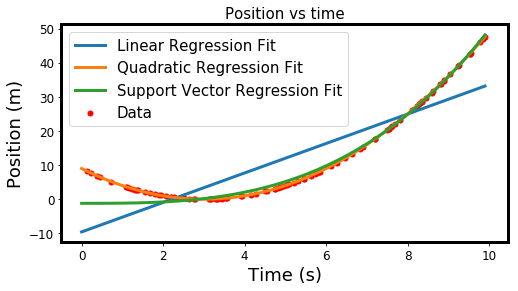

In [160]:
reg_nl = LinearRegression()
reg_nl.fit(t_list, pos_list)
x = np.arange(0,10,.1).reshape(100,1)

from sklearn.preprocessing import PolynomialFeatures
polytransform = PolynomialFeatures(degree=3 )
reg_nl2 = LinearRegression()
reg_nl2.fit(       polytransform.fit_transform(t_list)      , pos_list)

from sklearn.svm import SVR
svr_nl = SVR(kernel='poly')
svr_nl.fit(t_list, pos_list.reshape(n_s, ) )

fig = plt.figure()
ax = fig.add_subplot(111, xlabel=x_label, ylabel=y_label, title=plt_title)

ax.plot(x, reg_nl.predict( x ) ,label='Linear Regression Fit' )
ax.plot(x, reg_nl2.predict( polytransform.fit_transform(x) ) ,label='Quadratic Regression Fit' )
ax.plot(x, svr_nl.predict( x ) ,label='Support Vector Regression Fit' )
ax.scatter(t_list , pos_list, color='r',label='Data' )
ax.legend(loc=0)
plt.show()

What if we add noise? How would the polynomial regression work?

### Robustness: What happens if there's a bit of noise?
Let's add some noise to the data, also for simplicity, assume that the noise is gaussian. Let's see what you get!

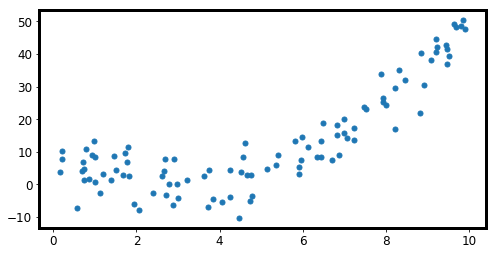

In [172]:
'''
We use the same noise function as before: 
g_noise takes the mean value of the noise, x_0 and 
the variance of the noise, sigma and 
the number of sample points, n_points and 
returns an array of shape (n_points,1)
'''
def g_noise(x0, sigma ,n_points=100):
    return np.random.normal(x0, sigma, size=n_points)


n_s = 100  ## Number of sample points
noise = g_noise(0,5,len(x)).reshape(n_s,1)

'''We generate the data and add the noise to the position measurements. '''
t_list , pos_list = position(2,v=-6,x0=9, t_max=10, n_samples=n_s)
noisy_pos_list = pos_list+noise

plt.scatter(t_list, noisy_pos_list)
plt.show()

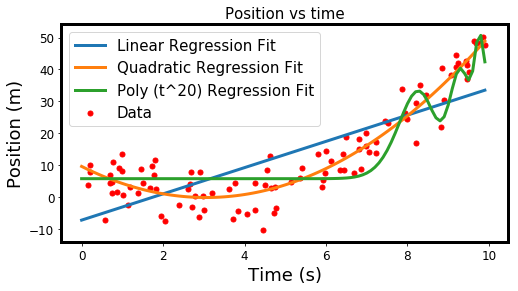

In [177]:
reg_nl = LinearRegression()
reg_nl.fit(t_list, noisy_pos_list)
x = np.arange(0,10,.1).reshape(100,1)

polytransform2 = PolynomialFeatures(degree=2 )
reg_nl2 = LinearRegression()
reg_nl2.fit(       polytransform2.fit_transform(t_list)      , noisy_pos_list)

polytransform20 = PolynomialFeatures(degree=50 )
reg_nl20 = LinearRegression()
reg_nl20.fit(       polytransform20.fit_transform(t_list)      , noisy_pos_list)


fig = plt.figure()
ax = fig.add_subplot(111, xlabel=x_label, ylabel=y_label, title=plt_title)

ax.plot(x, reg_nl.predict( x ) ,label='Linear Regression Fit' )
ax.plot(x, reg_nl2.predict( polytransform2.fit_transform(x) ) ,label='Quadratic Regression Fit' )
ax.plot(x, reg_nl20.predict( polytransform20.fit_transform(x) ) ,label='Poly (t^20) Regression Fit' )
ax.scatter(t_list , noisy_pos_list, color='r',label='Data' )
ax.legend(loc=0)
plt.show()

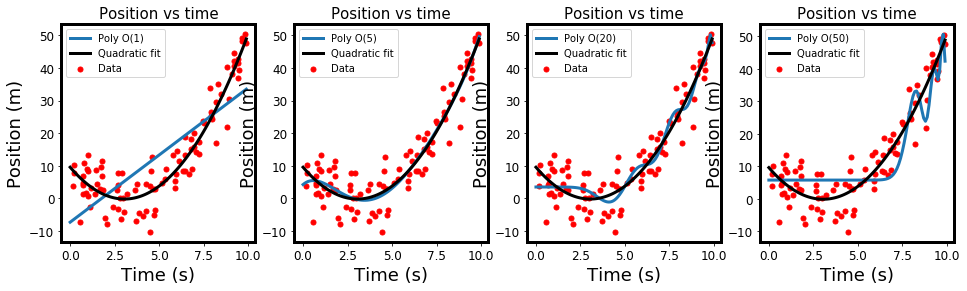

In [190]:
####### Add column to account for different values of sigma
####### Add the information about the score and validation info. 

fig = plt.figure(figsize=(16,4))
degrees = [1, 5, 20, 50]

quad_polytransform = PolynomialFeatures(degree=2 )
reg_quad = LinearRegression()
reg_quad.fit(       quad_polytransform.fit_transform(t_list)      , noisy_pos_list)


for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1, xlabel=x_label, ylabel=y_label, title=plt_title)
    polytransform = PolynomialFeatures(degree = degrees[i] )
    reg = LinearRegression()
    reg.fit(  polytransform.fit_transform(t_list)      , noisy_pos_list)
    
    ax.scatter(t_list , noisy_pos_list, color='r',label='Data' )
    ax.plot(x, reg.predict( polytransform.fit_transform(x) ) ,label='Poly O('+str(degrees[i])+')' )
    ax.plot(x, reg_quad.predict( polytransform2.fit_transform(x) ) ,label='Quadratic fit', color='black')
    ax.legend(loc=0, fontsize = 10)

plt.tight_layout
plt.show()

## Regression
We could use a non-linear model, this brings up several questions. 
Imagine we are given a set of data with different features and our tasks

## Complexity of the model
We could use a non-linear model, this brings up several questions. 
Imagine we are given a set of data with different features and our tasks